<a href="https://colab.research.google.com/github/limeng1011/titanicdataanalysis/blob/main/KaggleTitanic022322.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
titanic_df = pd.read_csv('train.csv')

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


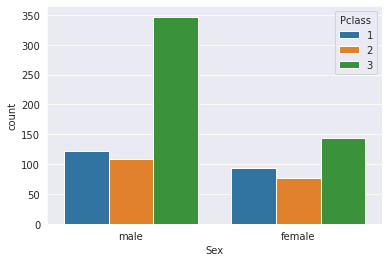

In [ ]:
with sns.axes_style('darkgrid'):
  sns.countplot(x = 'Sex', 
                data = titanic_df,
                hue = 'Pclass')

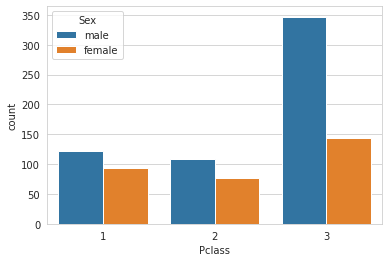

In [ ]:
with sns.axes_style('whitegrid'):
  sns.countplot(x = 'Pclass',
                data = titanic_df,
                hue = 'Sex')

In [ ]:
def male_female_child(passenger):
  sex, age = passenger
  if age < 16:
    return 'child'
  else:
    return sex

In [ ]:
titanic_df['Person'] = titanic_df[['Sex', 'Age']].apply(male_female_child, axis=1)

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


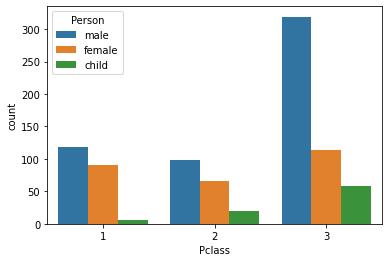

In [ ]:
sns.countplot(x = 'Pclass',
              data = titanic_df,
              hue = 'Person')

Text(0.5, 1.0, 'Mean of the age is: 29.70 and skewness of the age is: 0.39')

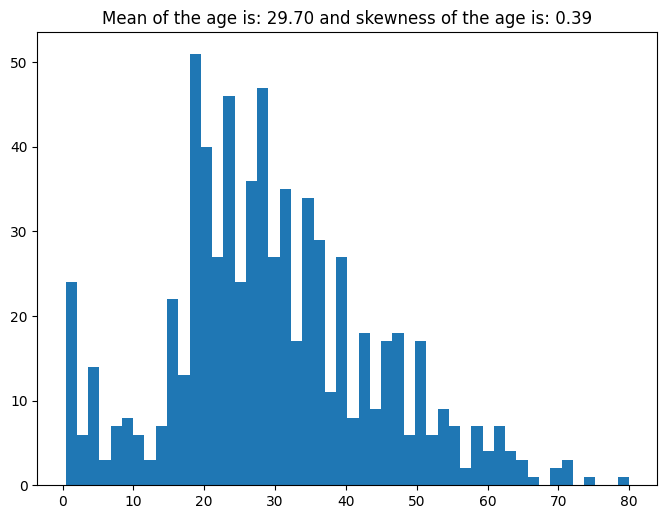

In [ ]:
plt.figure(figsize = (8,6), dpi=100, edgecolor='blue')
plt.hist(x = titanic_df['Age'],
         bins = 50)
plt.title(f"Mean of the age is: {titanic_df['Age'].mean():.2f} and skewness of the age is: {titanic_df['Age'].skew():.2f}")

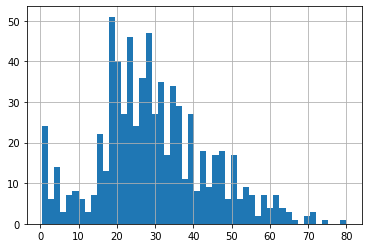

In [ ]:
titanic_df['Age'].hist(bins=50)

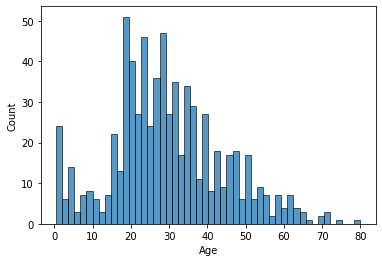

In [ ]:
sns.histplot(x = titanic_df['Age'],
             bins = 50)

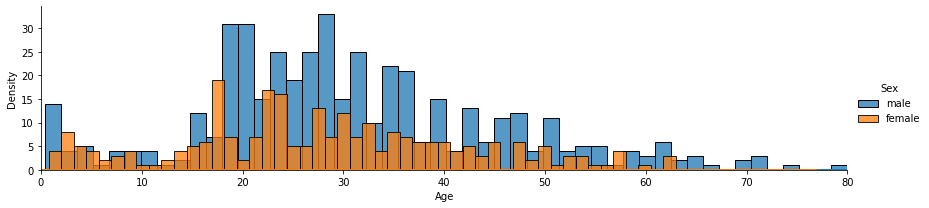

In [ ]:
fig = sns.FacetGrid(titanic_df,
                    hue = 'Sex',
                    aspect = 4,
                    )
fig.map(sns.kdeplot, 'Age')
fig.map(sns.histplot, 'Age', bins=50)
fig.set(xlim = (0, titanic_df['Age'].max()))
fig.add_legend()

(0.0, 100.0)

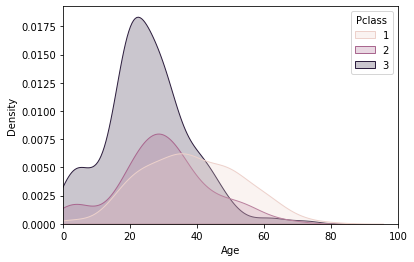

In [ ]:
sns.kdeplot(x = titanic_df['Age'],
            hue = titanic_df['Pclass'],
            shade = True,
            )
#fig.set(xlim = (0, titanic_df['Age'].max()))
#fig.add_legend()
plt.xlim(0,100)

In [ ]:
deck = titanic_df['Cabin'].dropna()

In [ ]:
deck

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object

In [ ]:
deck[1]

'C85'

In [ ]:
for index,value in deck.items():
  deck[index] = value[0]

In [ ]:
deck

1      C
3      C
6      E
10     G
11     C
      ..
871    D
872    B
879    C
887    B
889    C
Name: Cabin, Length: 204, dtype: object

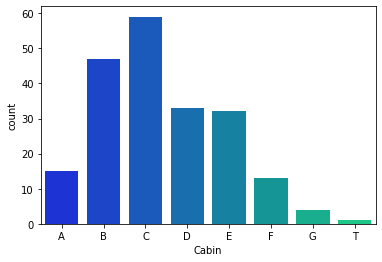

In [ ]:
cabin_df = pd.DataFrame(deck)
cabin_df.columns = ['Cabin']

sns.countplot(x = 'Cabin',
              data = cabin_df,
              palette = 'winter',
              order = ['A','B','C','D','E','F','G','T'])

In [ ]:
px.bar(x = cabin_df['Cabin'].value_counts().index,
       y = cabin_df['Cabin'].value_counts().values,
       color = cabin_df['Cabin'].value_counts().values)

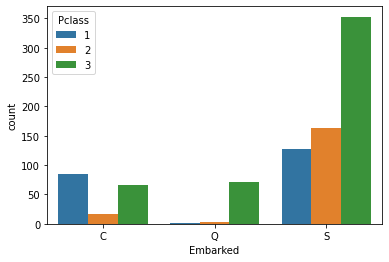

In [ ]:
sns.countplot(x = 'Embarked',
              data = titanic_df,
              hue = 'Pclass',
              order = ['C','Q','S'])

In [ ]:
titanic_df['Alone'] = np.where((titanic_df['SibSp']==0) | (titanic_df['Parch']==0), 'Alone', 'With Family')

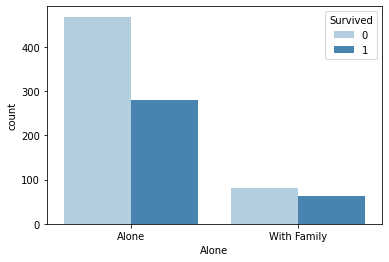

In [ ]:
sns.countplot(x = 'Alone',
              data = titanic_df,
              hue = 'Survived',
              palette = 'Blues')

In [ ]:
titanic_df['Survivor'] = titanic_df['Survived'].map({0:'No', 1:'Yes'})

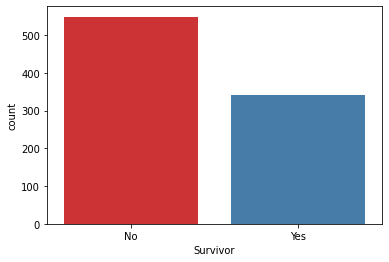

In [ ]:
sns.countplot(x = 'Survivor',
              data = titanic_df,
              palette = 'Set1')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



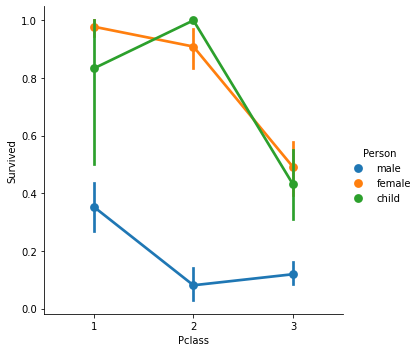

In [ ]:
sns.factorplot('Pclass',
               'Survived',
               data = titanic_df,
               hue = 'Person')

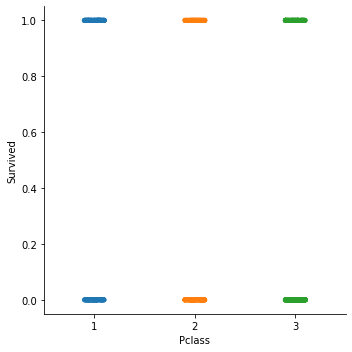

In [ ]:
sns.catplot(x = 'Pclass',
            y = 'Survived',
            data = titanic_df)

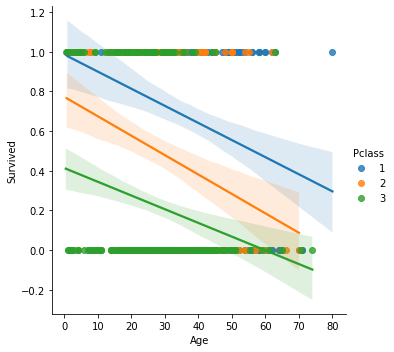

In [ ]:
sns.lmplot(x = 'Age',
           y = 'Survived',
           data = titanic_df,
           hue = 'Pclass')

In [ ]:
generations = [10,20,40,60,80]

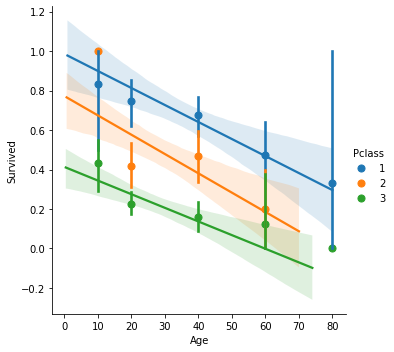

In [ ]:
sns.lmplot(x = 'Age',
           y = 'Survived',
           data = titanic_df,
           x_bins = generations,
           hue = 'Pclass')

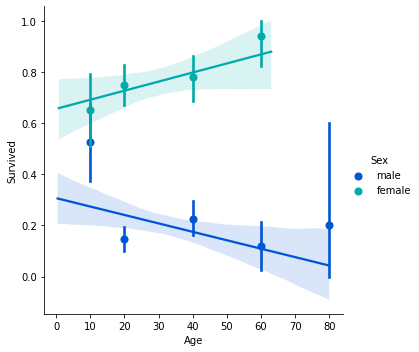

In [ ]:
sns.lmplot(x = 'Age',
           y = 'Survived',
           data = titanic_df,
           hue = 'Sex',
           palette = 'winter',
           x_bins = generations)

In [ ]:
cabin_df

,Cabin
1,C
3,C
6,E
10,G
11,C
...,...
871,D
872,B
879,C
887,B


In [ ]:
merged_df = pd.merge(titanic_df, cabin_df, left_index=True, right_index=True)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 1 to 889
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  204 non-null    int64  
 1   Survived     204 non-null    int64  
 2   Pclass       204 non-null    int64  
 3   Name         204 non-null    object 
 4   Sex          204 non-null    object 
 5   Age          185 non-null    float64
 6   SibSp        204 non-null    int64  
 7   Parch        204 non-null    int64  
 8   Ticket       204 non-null    object 
 9   Fare         204 non-null    float64
 10  Cabin_x      204 non-null    object 
 11  Embarked     202 non-null    object 
 12  Person       204 non-null    object 
 13  Alone        204 non-null    object 
 14  Survivor     204 non-null    object 
 15  Cabin_y      204 non-null    object 
dtypes: float64(2), int64(5), object(9)
memory usage: 27.1+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



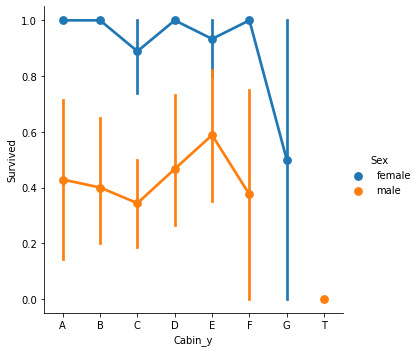

In [ ]:
sns.factorplot(x = 'Cabin_y',
           y = 'Survived',
           data = merged_df,
           hue = 'Sex',
           order = ['A','B','C','D','E','F','G','T']
           )

In [ ]:
gender_survial = titanic_df.groupby(['Sex','Survived'], as_index=False).agg({'PassengerId': pd.Series.count})

In [ ]:
px.bar(gender_survial,
       x = 'Sex',
       y = 'PassengerId',
       color = 'Survived',
       barmode = 'stack')


In [ ]:
px.histogram(titanic_df,
             x = 'Sex',
             color = 'Survived')

In [ ]:
sns.factorplot('Sex',
               data = titanic_df,
               hue = 'Pclass')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



TypeError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


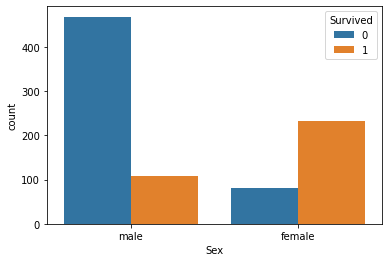

In [ ]:
sns.countplot('Sex', data=titanic_df, hue='Survived')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


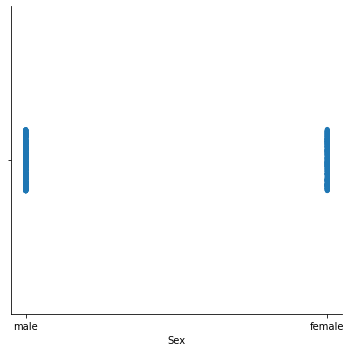

In [ ]:
sns.catplot('Sex', data=titanic_df)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


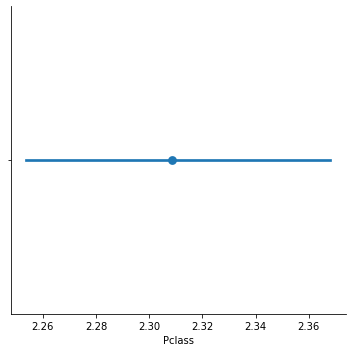

In [ ]:
sns.factorplot('Pclass', data=titanic_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


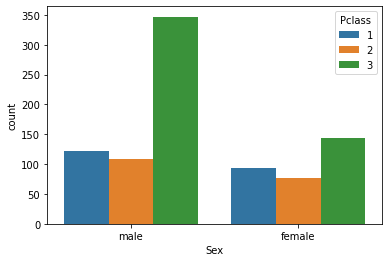

In [ ]:
sns.countplot('Sex', data=titanic_df, hue='Pclass')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


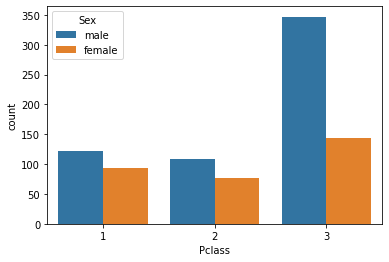

In [ ]:
sns.countplot('Pclass', data=titanic_df, hue='Sex')

In [ ]:
def male_female_child(passenger):
  age,sex = passenger
  
  if age < 15:
    return 'child'
  else:
    return sex

In [ ]:
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis=1)

In [ ]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


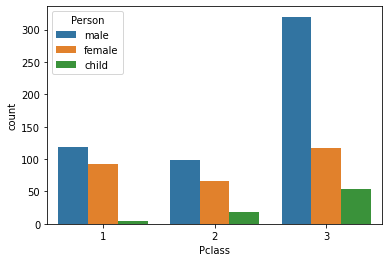

In [ ]:
sns.countplot('Pclass', data=titanic_df, hue='Person')

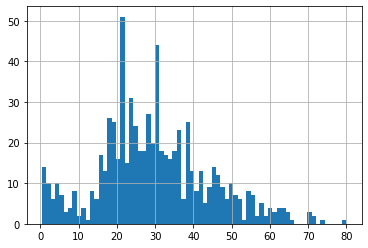

In [ ]:
titanic_df['Age'].hist(bins=70)

In [ ]:
titanic_df['Age'].mean()

29.69911764705882

In [ ]:
titanic_df['Person'].value_counts()

male      538
female    275
child      78
Name: Person, dtype: int64

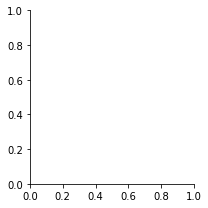

In [ ]:
fig = sns.FacetGrid(titanic_df, hue='Sex')

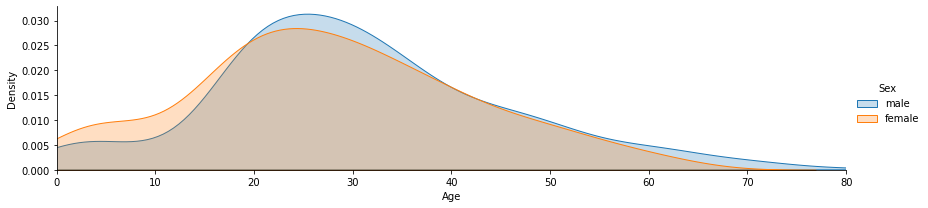

In [ ]:
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

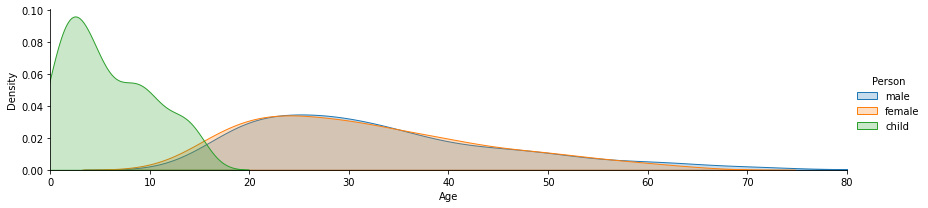

In [ ]:
fig = sns.FacetGrid(titanic_df, hue='Person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

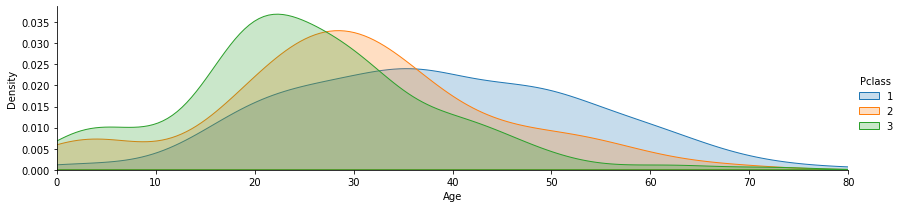

In [ ]:
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

In [ ]:
deck = titanic_df['Cabin'].dropna()

In [ ]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [ ]:
levels = []
for level in deck:
  levels.append(level[0])

In [ ]:
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

In [ ]:
cabin_df

,Cabin
0,C
1,C
2,E
3,G
4,C
...,...
199,D
200,B
201,C
202,B


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


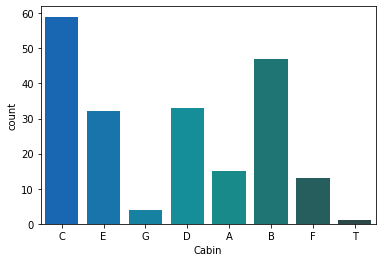

In [ ]:
sns.countplot('Cabin',data=cabin_df, palette='winter_d')

In [ ]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


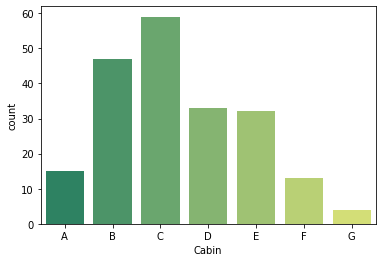

In [ ]:
sns.countplot('Cabin', data=cabin_df, palette='summer', order=['A','B','C','D','E','F','G'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


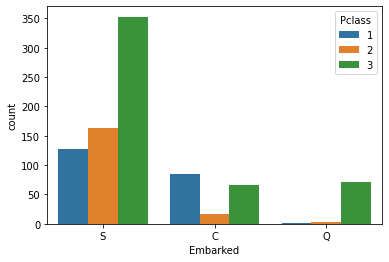

In [ ]:
sns.countplot('Embarked',data=titanic_df,hue='Pclass')

In [ ]:
def if_alone(passenger):
  SibSp, Parch = passenger
  if SibSp == 1 or Parch ==1:
    return 1

  else:
    return 0

In [ ]:
titanic_df['WithCompany'] = titanic_df[['SibSp','Parch']].apply(if_alone, axis=1)

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,WithCompany
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


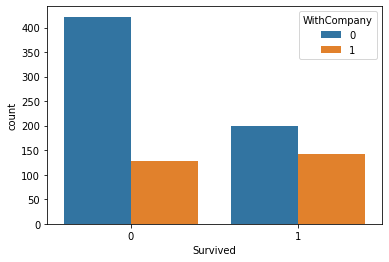

In [ ]:
sns.countplot('Survived', data=titanic_df, hue='WithCompany')

In [ ]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,WithCompany,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


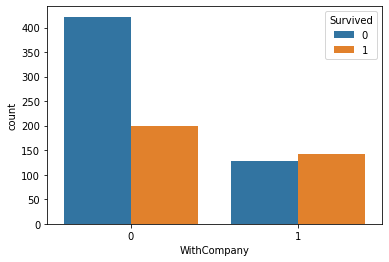

In [ ]:
sns.countplot('WithCompany', data=titanic_df, hue='Survived')

In [ ]:
titanic_df['Alone'].loc[titanic_df.Alone > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df.Alone == 0] = 'Alone'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


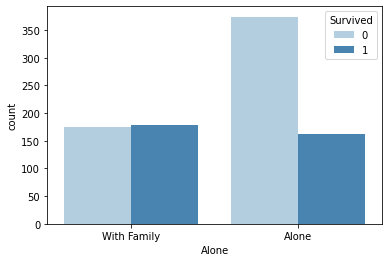

In [ ]:
sns.countplot('Alone', data=titanic_df, palette='Blues', hue='Survived')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


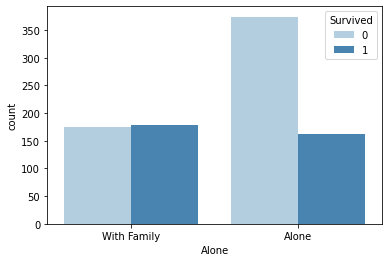

In [ ]:
sns.countplot('Alone', data=titanic_df, palette="Blues", hue='Survived')

In [ ]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'No', 1:'Yes'})

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,WithCompany,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1,With Family,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1,With Family,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0,Alone,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1,With Family,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0,Alone,No


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


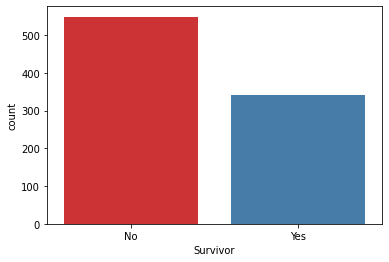

In [ ]:
sns.countplot('Survivor', data=titanic_df, palette='Set1')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


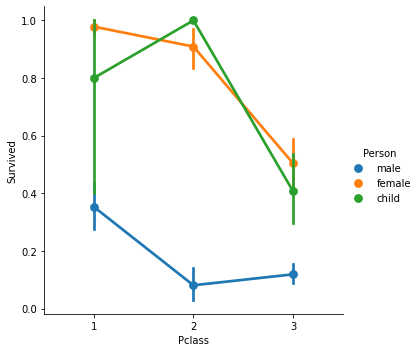

In [ ]:
sns.factorplot('Pclass','Survived', data=titanic_df, hue='Person')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


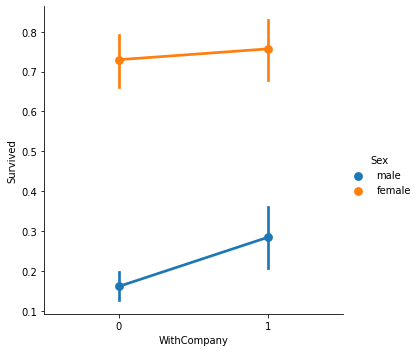

In [ ]:
sns.factorplot('WithCompany','Survived',data=titanic_df, hue='Sex')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


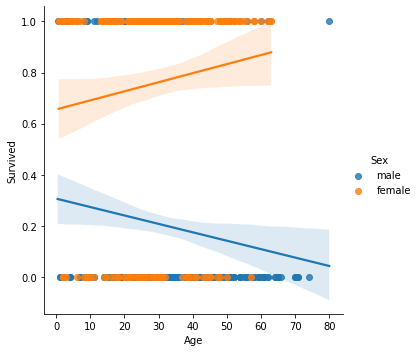

In [ ]:
sns.lmplot('Age','Survived',data=titanic_df, hue='Sex')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


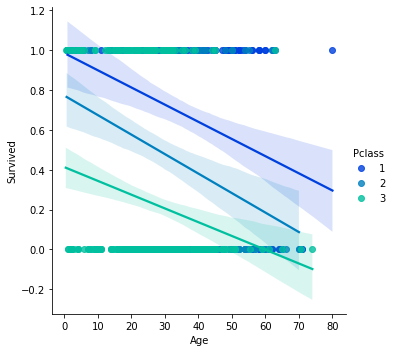

In [ ]:
sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic_df, palette='winter')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


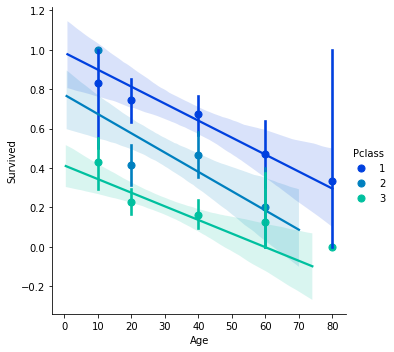

In [ ]:
generations = [10,20,40,60,80]
sns.lmplot('Age','Survived', hue='Pclass', data=titanic_df, palette = 'winter', x_bins = generations)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


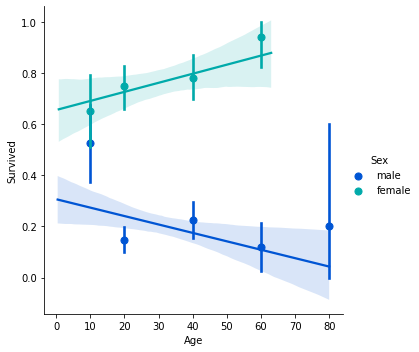

In [ ]:
sns.lmplot('Age', 'Survived', hue='Sex', data=titanic_df, palette='winter', x_bins=generations)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


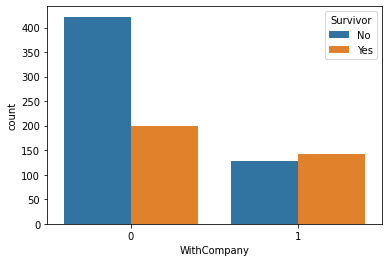

In [ ]:
sns.countplot('WithCompany', data=titanic_df, hue='Survivor')